In [1]:
import permutationTest as pt 
import numpy as np


In [2]:
#from utils2 import *
import time
#from significance_of_mean_cuda import significance_of_mean_cuda

In [3]:
def timePlotSNS(TIMEParallel, TIMEsingleThred, sampleShape,binVar=False, log=False, path=None):
    """Create SNS timeseries-plot"""
    fig, ax = plt.subplots()
    
    sns.set(style="white")
    sns.set_context("talk")
    
    preparePdParallel = preparePandas(TIMEParallel, sampleShape)
    preparePdSingle = preparePandas(TIMEsingleThred, sampleShape, 'Single thread')
    
    data = preparePdParallel + preparePdSingle
    
    pdData = pd.DataFrame(data, columns=['Method', 'time(s)','bins'])
    
    if log:        
        MAX = max(max(TIMEParallel), max(TIMEsingleThred))
        MIN = min(min(TIMEParallel), min(TIMEsingleThred))

        RANGE = np.arange(np.floor(MIN), np.ceil(MAX))
        snsPlot = sns.lineplot(x="bins", y="time(s)",
             hue="Method",
             data=pdData)#.set(yticks = RANGE, yticklabels=10**RANGE)
        plt.yticks(RANGE, 10.0**RANGE)
        
        
    else:
        snsPlot = sns.lineplot(x="bins", y="time(s)",
             hue="Method",
             data=pdData,)
    
    if binVar:
        plt.xlabel(r"$n$", fontsize=20)
        
    else:
        plt.xlabel(r"$n_{w}$", fontsize=20)
    
    plt.ylabel(r"$time(s)$", fontsize=20)
    
    
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:])
    
    plt.setp(snsPlot.get_legend().get_texts(), fontsize=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.tight_layout()
    
    if path:   
        fig = snsPlot.get_figure()
        fig.savefig(path)

### Get synthetic data

In [8]:
n_samples = 1
n = m =  500
s =  [50, 100, 200,250,300,350,400,450,500]
path = "figures/parallelVsSingleThread"

In [78]:
data = lambda n,n_samples : [np.random.randint(0,n,n,dtype=np.int32) for _ in range(n_samples)]

In [ ]:
A_f = [np.random.randint(0,n,m,dtype=np.int32) for _ in range(n_samples)]
B_f

In [79]:
def runExperiment(method_list, names_list, bins, data, n, n_samples):
    method_dict = dict()
    for method, name in zip(method_list, names_list):
        method_dict[name] = dict()
        method_dict[name]["p_values"] = list()
        method_dict[name]["time"] = list()
        for bins in s:
            np.random.seed(42)
            A = np.asarray(data(n, n_samples))
            B = np.asarray(data(n, n_samples))
        
            start = time.time()
            method_dict[name]["p_values"].append(method(A,B,bins))
            end = time.time()
            method_dict[name]["time"].append(end - start)
    return method_dict
    

In [ ]:
method_list = [pt.GreenFloat, ]
runExperiment(method_list, names_list, bins, data, n, n_samples)

In [10]:
def runExperiment():
    t_GF_list = list()
    t_GFM_list = list()
    t_GFC_list = list()
    t_CSF_list = list()
    
    for bins in s:
        np.random.seed(42)
        A = np.asarray([np.random.randint(0,n,m,dtype=np.int32) for _ in range(n_samples)])
        B = np.asarray([np.random.randint(0,n,n,dtype=np.int32) for _ in range(n_samples)])
        
        start = time.time()
        P_GF = pt.GreenFloat(A,B,bins)
        end = time.time()
        t_GF = end - start
        t_GF_list.append(t_GF)
        print("GreenFloat: ",t_GF)
        
        start = time.time()
        P_GFM = pt.GreenFloat(A,B,bins, multiThread=True)
        end = time.time()
        t_GFM = end - start
        t_GFM_list.append(t_GFM)
        print("GreenFloatMultiThread: ",t_GFM)

        start = time.time()
        p_GFC = pt.GreenFloatCuda(A,B,bins)
        end = time.time()
        t_GFC = end - start
        t_GFC_list.append(t_GFC)
        print("GreenFloatCuda: ", t_GFC)
    
        start = time.time()
        P_chf = pt.coinShiftFloat(A,B,bins)
        end = time.time()
        t_CSF = end - start
        t_CSF_list.append(t_CSF)
        print("CoinShiftFloat: ",t_CSF)
    
        print(np.allclose(p_GFC,P_GF, P_chf, P_GFM))
        print("------------------------------")
    return t_GFC_list, t_GF_list, t_CSF_list, t_GFM_list
    

In [11]:
if __name__=="__main__":
    t_GFC_list, t_GF_list, t_CSF_list, t_GFM_list = runExperiment()
    #timePlotSNS(np.array(gpu1), np.array(cpu1), np.array(s), log=False, path=getPATH(path, "nonLog"))
    #timePlotSNS(np.log10(np.array(gpu1)), np.log10(np.array(cpu1)), np.array(s), log=True, path=getPATH(path, "Log"))

GreenFloat:  6.891271352767944
GreenFloatMultiThread:  2.460994243621826
GreenFloatCuda:  0.4083411693572998
CoinShiftFloat:  2.2163186073303223
True
------------------------------
GreenFloat:  14.109299898147583
GreenFloatMultiThread:  4.96933913230896
GreenFloatCuda:  0.6896810531616211
CoinShiftFloat:  4.68802809715271
True
------------------------------
GreenFloat:  28.54254984855652
GreenFloatMultiThread:  10.119699239730835
GreenFloatCuda:  1.3789210319519043
CoinShiftFloat:  9.584547281265259
True
------------------------------
GreenFloat:  35.69727873802185
GreenFloatMultiThread:  12.709302425384521
GreenFloatCuda:  1.743492603302002
CoinShiftFloat:  12.096652269363403
True
------------------------------
GreenFloat:  42.869505405426025
GreenFloatMultiThread:  15.205349683761597
GreenFloatCuda:  2.2457404136657715
CoinShiftFloat:  14.767664432525635
True
------------------------------
GreenFloat:  50.01277422904968
GreenFloatMultiThread:  17.808592081069946
GreenFloatCuda:  3.02

In [23]:
def preparePandas(timeData, sampleSizes, name):
    """Create DF for sns-plots"""
    preparePd = list()
    for time, sample in zip(timeData, sampleSizes):
        preparePd.append([str(name),time, sample])
        
            
    return preparePd

In [65]:
def timePlotSNS(TimeList_list, NameList, sampleShape,binVar=False, log=False, path=None):
    """Create SNS timeseries-plot"""
    a4_dims = (11.7/1.5, 8.27/1.5)
    fig, ax = plt.subplots(figsize=a4_dims)
    

    
    sns.set(style="white")
    sns.set_context("talk")
    
    for i, (time_list, name) in enumerate(zip(TimeList_list, NameList)):
        if log:
            df = preparePandas(np.log10(time_list), sampleShape, name)
        else:
            df = preparePandas(time_list, sampleShape, name)
            
        if i ==0:
            data = df
        else:
            data += df
            

        
    
    
    pdData = pd.DataFrame(data, columns=['Method', 'time(s)','bins'])
    

    
    if log:        
        MAX = max(pdData["time(s)"])
        MIN = min(pdData["time(s)"])

        RANGE = np.arange(np.floor(MIN), np.ceil(MAX))
        snsPlot = sns.lineplot(x="bins", y="time(s)",
             hue="Method",
             data=pdData)#.set(yticks = RANGE, yticklabels=10**RANGE)
        plt.yticks(RANGE, 10.0**RANGE)
        
        
    else:
        snsPlot = sns.lineplot(x="bins", y="time(s)",
             hue="Method",
             data=pdData,)
    
    if binVar:
        plt.xlabel(r"$n$", fontsize=20)
        
    else:
        plt.xlabel(r"$n_{w}$", fontsize=20)
    
    plt.ylabel(r"$time(s)$", fontsize=20)
    
    
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:])
    
    plt.setp(snsPlot.get_legend().get_texts(), fontsize=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.tight_layout()
    
    
    
    if path:   
        fig = snsPlot.get_figure()
        fig.savefig(path)

In [71]:
!ls "./figures"

experiemnt1


In [66]:
TimeList_list = [t_GFC_list, t_GF_list, t_CSF_list, t_GFM_list]
NameList = ["Green Cuda", "Green", "Coin Shift", "Green Multithreading"]

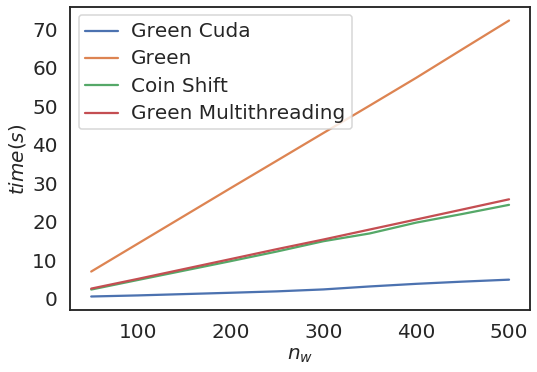

In [72]:
timePlotSNS(TimeList_list, NameList, s,binVar=False, log=False, path="./figures/experiemnt1/TimeVsbins_linear")


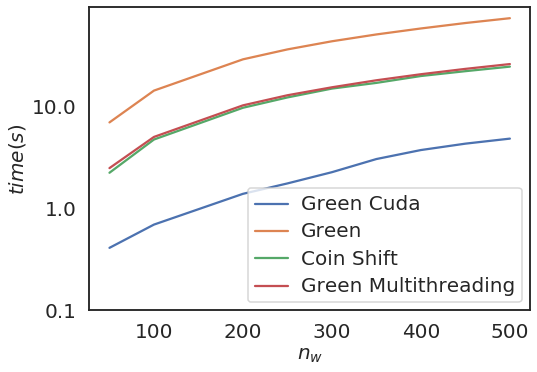

In [73]:
timePlotSNS(TimeList_list, NameList, s, log=True, path="./figures/experiemnt1/TimeVsbins_log")